\newpage

In [30]:
import pandas as pd
import numpy as np

heart_disease = pd.read_csv('https://raw.githubusercontent.com/PratheepaJ/datasets/refs/heads/master/ass6-dataset.csv') 

1. Define and describe a classification problem using the dataset.

Want to see if we can create a possible coding solution that can predict whether an individual has a heart disease based off of previous samples and the patient's current results to a consultation.

2. Apply any chosen data transformations, or explain why no transformations were necessary.

In [31]:
#question 6 has to be done in question 2 to avoid tedious coding.
heart_diseaseD = heart_disease.dropna()

#question 2 is now done applying transformations to the data
response_var = heart_diseaseD['num']

from sklearn.preprocessing import scale, StandardScaler
#KNN requires scaling
KNN_Predictor = heart_diseaseD.drop(columns=['num'])
scaler = StandardScaler()
KNN_PredictorV = pd.DataFrame(scaler.fit_transform(heart_diseaseD.drop(columns=['num'])), columns=heart_diseaseD.columns[:-1])

#Tree Classification does not require scaling
Tree_Predictor = heart_diseaseD.drop(columns=['num'])

3. Provide a detailed description of the dataset, including variables, summaries, number of observations, data types, and distributions (include at least three statements).

The categorical variables in the dataset are sex, cp, fbs, restecg, exang, slope and thal. The other variables are all integers. Our target variable will be "num", the diagnosis of heart disease. The thal and ca variables both contain missing values.

4.

In [32]:
heart_diseaseD = heart_diseaseD.replace({'num': { 2: 1, 3: 1, 4: 1}})
ResponseVar = response_var.replace({2:1,3:1,4:1})

ResponseVar.head(5)

0    0
1    1
2    1
3    0
4    0
Name: num, dtype: int64

5.

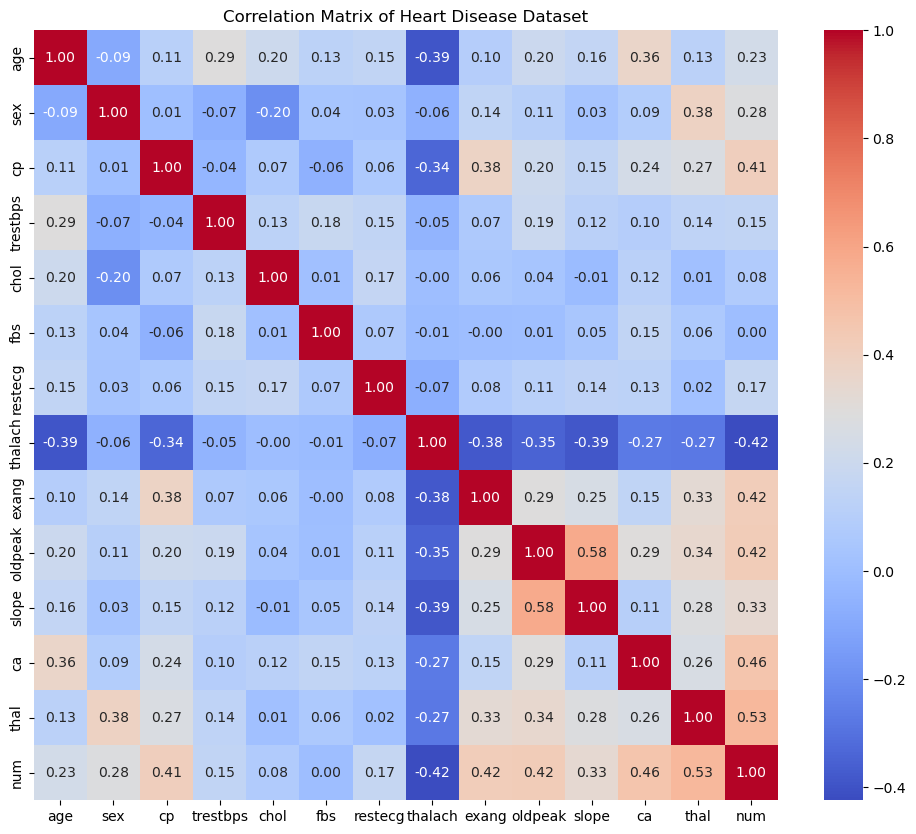

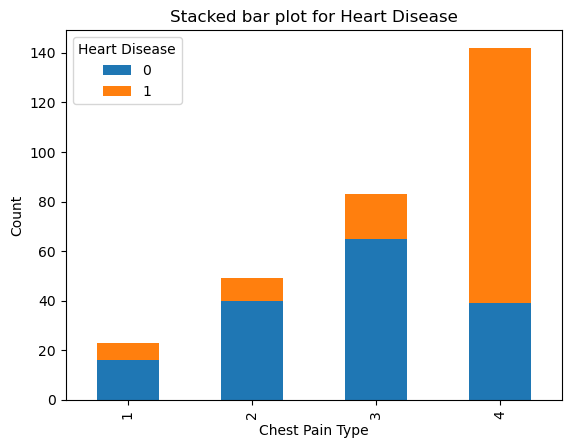

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = heart_diseaseD.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Heart Disease Dataset')
plt.show()

stacked_data = heart_diseaseD.groupby(['cp','num']).size().unstack().fillna(0)
stacked_data.plot(kind='bar', stacked=True)
plt.ylabel('Count')
plt.xlabel('Chest Pain Type')
plt.title('Stacked bar plot for Heart Disease')
plt.legend(title='Heart Disease')
plt.show()

Using a correlation matrix for the Heart Disease dataset we can see how well the features correlate with the response variable 'num'. Based on the results, thal has the highest correlation with the other variables and the highest correlation (0.53) to the response variable indicating its potential significance in feature selection. On the other hand, fbs and chol have very low correlation with the other variables and the response variable suggesting they may not be significant features.

The stacked bar graph shows the amount of people that do or don't have a heart disease with each chest pain type. Clearly as the chest pain type increases the amount of people with heart disease also increases. This indicates that chest pain type is a significant feature in predicting heart disease.

6.

In [34]:
heart_diseaseD.shape

(297, 14)

now 297 oberservations remain from the original 303.

7.

In [35]:
#need to drop categorical variables

from sklearn.preprocessing import StandardScaler

heart_diseaseDrop = heart_diseaseD.drop(columns=['sex','slope','thal','cp','restecg','fbs','num','exang'])

scalar = StandardScaler()
scalar.fit_transform(heart_diseaseDrop)
heart_diseaseDrop = pd.DataFrame(scalar.transform(heart_diseaseDrop),columns=heart_diseaseDrop.columns)

g:\Visual Studio\Projects\.conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
g:\Visual Studio\Projects\.conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
g:\Visual Studio\Projects\.conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
g:\Visual Studio\Projects\.conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known

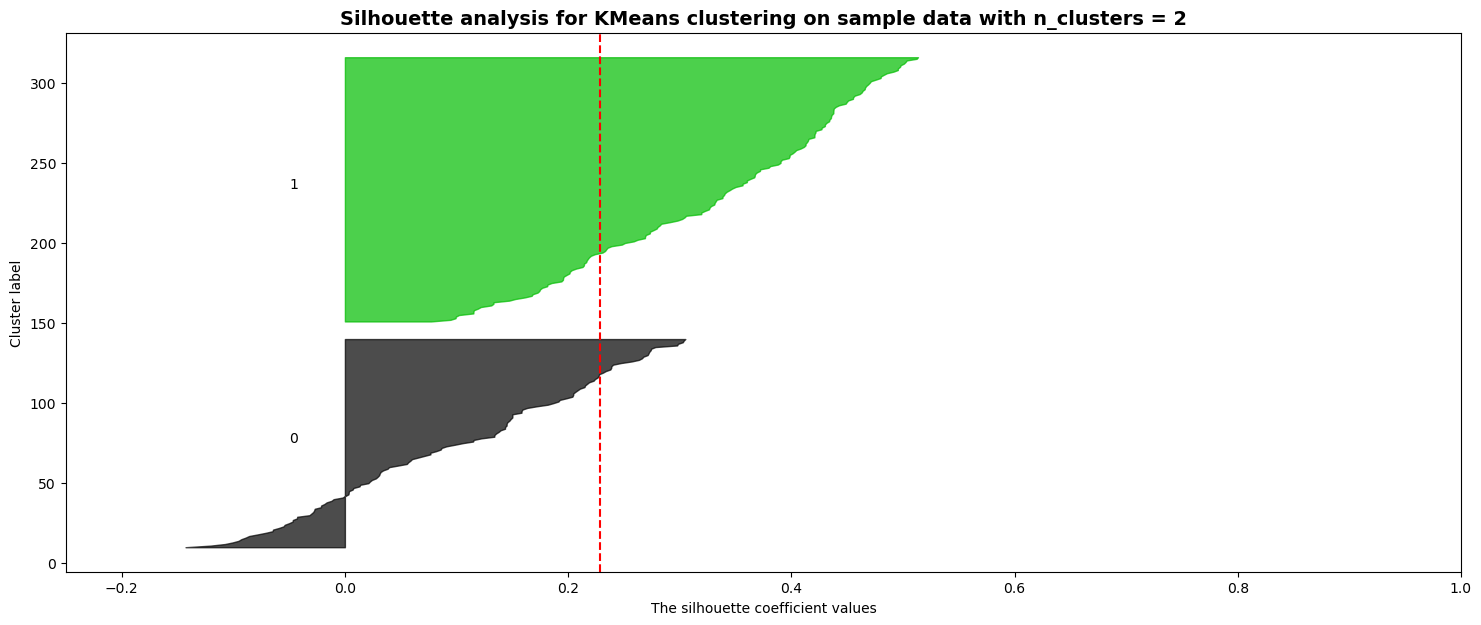

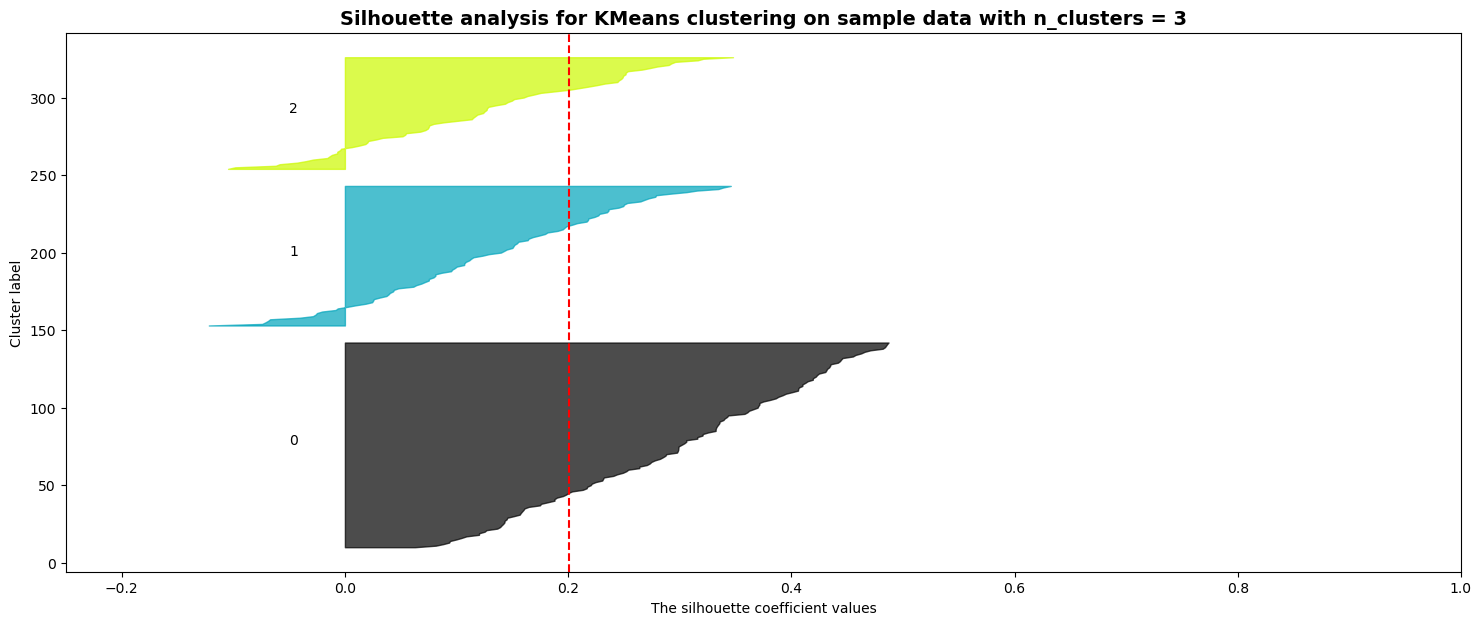

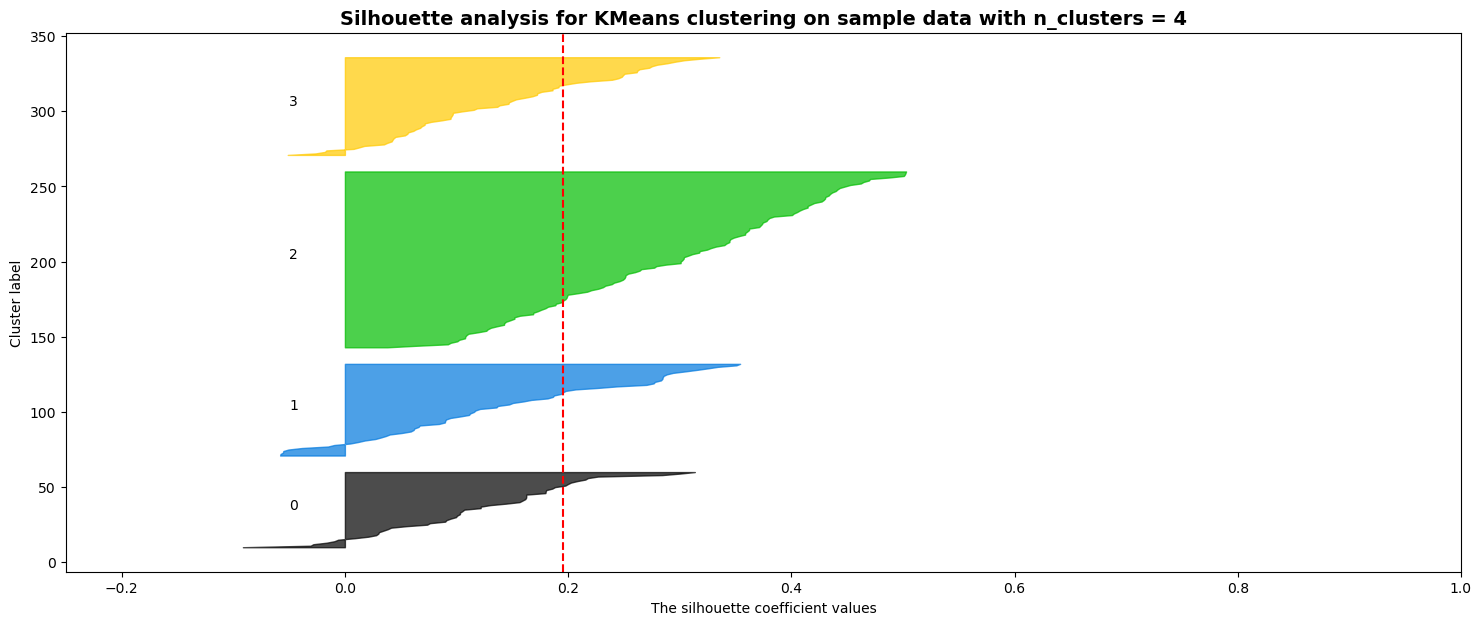

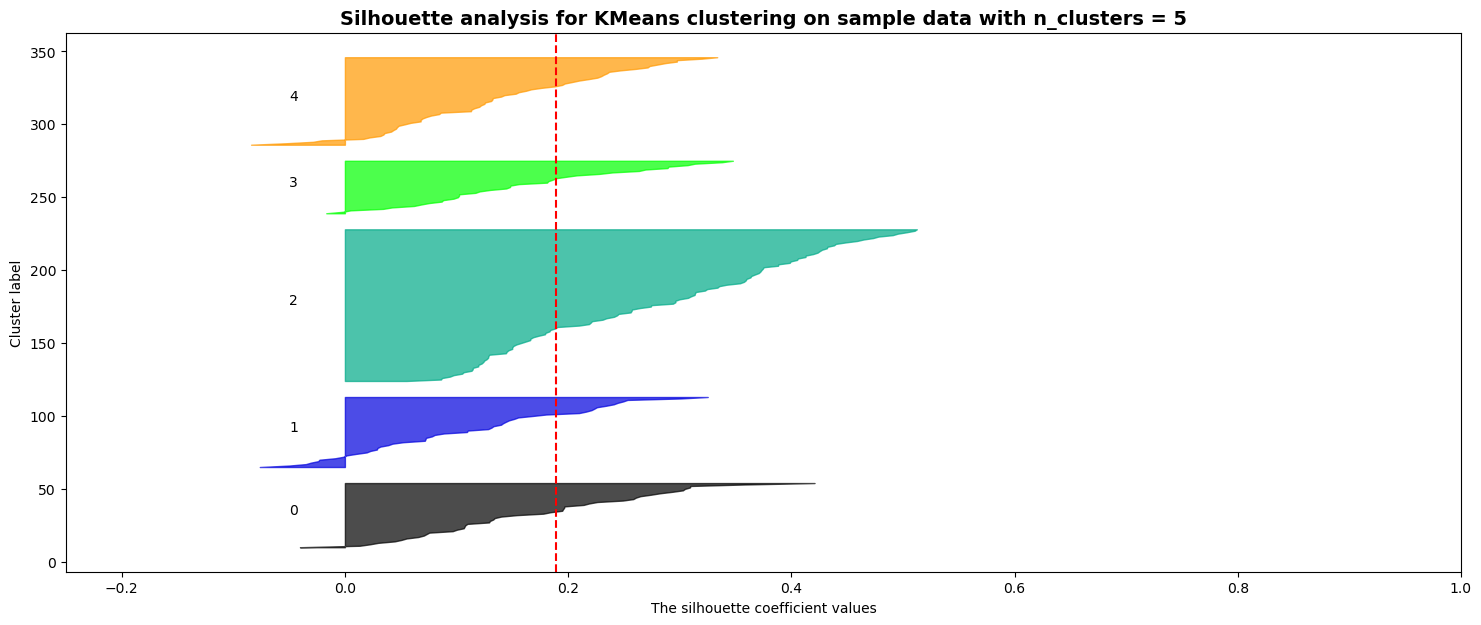

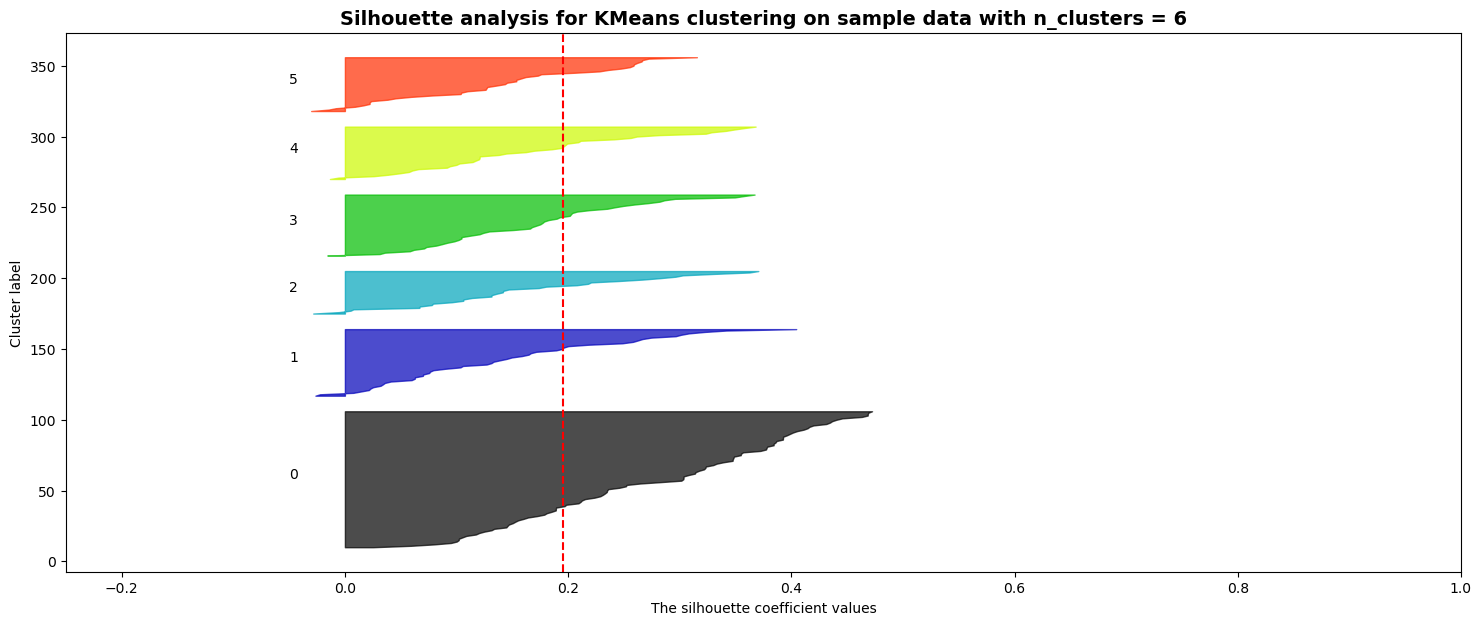

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = range(2,7)
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters = n_clusters, n_init = 20, random_state=0)
    cluster_labels_km = km.fit_predict(heart_diseaseDrop)
    silhouette_avg_km = silhouette_score(heart_diseaseDrop, cluster_labels_km)
    
    sample_silhouette_values = silhouette_samples(heart_diseaseDrop, cluster_labels_km)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.25, 1])

    y_lower = 10
    
    for i in range(n_clusters):
       
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_km == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

       
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for various cluster")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    
    ax1.axvline(x=silhouette_avg_km, color="red", linestyle="--")
    plt.title(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

2 clusters seems like a good choice.

g:\Visual Studio\Projects\.conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


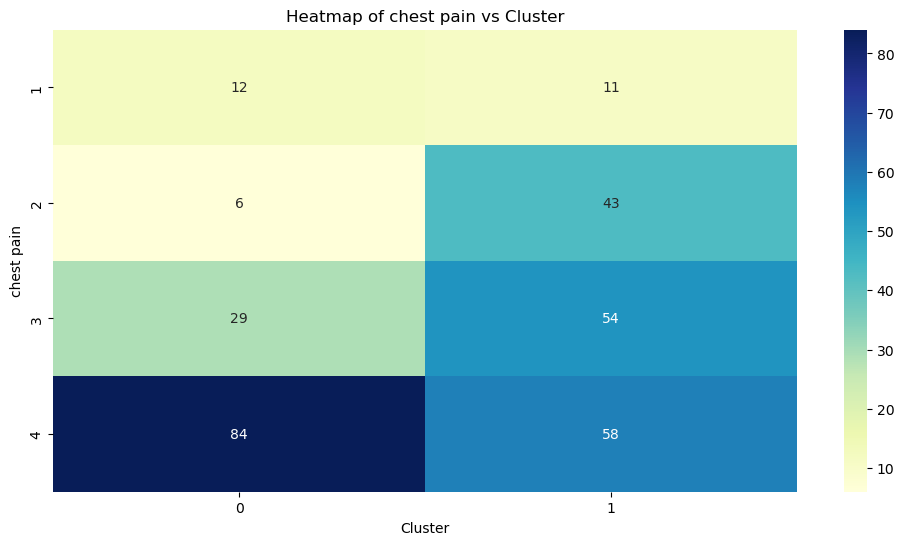

In [37]:
chest_pain = [1,2,3,4]
heart_diseaseD['cp']=  pd.Categorical(heart_diseaseD['cp'], categories=chest_pain, ordered=True)

km = KMeans(n_clusters = 2, n_init = 20, random_state=0)
km.fit_predict(heart_diseaseDrop)
heart_diseaseD['cluster'] = km.labels_
heart_diseaseD['cluster'] = heart_diseaseD['cluster'].astype('category')

plt.figure(figsize=(12, 6))
sns.heatmap(pd.crosstab(heart_diseaseD['cp'], heart_diseaseD['cluster']), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of chest pain vs Cluster')
plt.xlabel('Cluster')
plt.ylabel('chest pain')
plt.show()

C:\Users\4xrol\AppData\Local\Temp\ipykernel_33992\328208271.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = heart_diseaseD.pivot_table(values='num', index='cp', columns='cluster', aggfunc='mean')


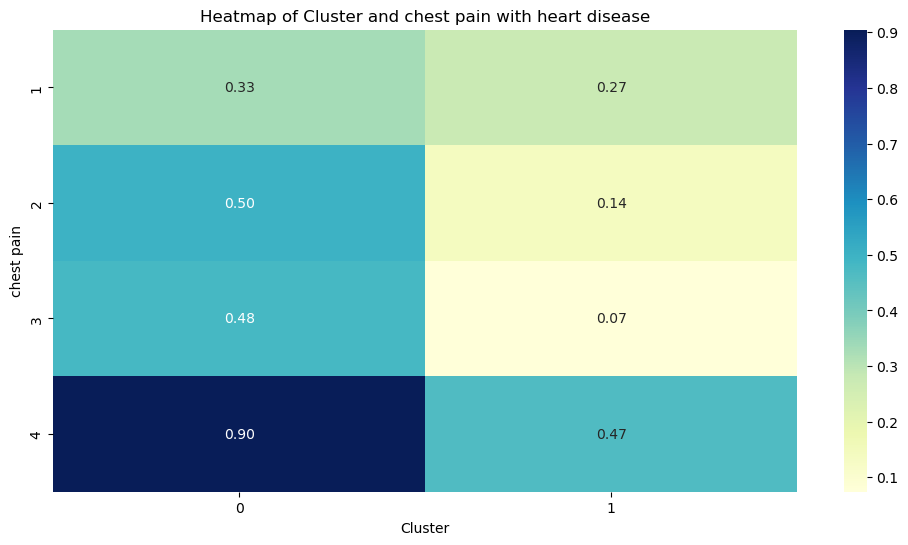

In [38]:
plt.figure(figsize=(12, 6))
pivot_table = heart_diseaseD.pivot_table(values='num', index='cp', columns='cluster', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Heatmap of Cluster and chest pain with heart disease')
plt.xlabel('Cluster')
plt.ylabel('chest pain')
plt.show()

From the above heatmap Chest pain 4 seems to have a significant correlation to having some type of heart disease.

8.

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score
#make the test and train groups
#need to make a test set for KNN and for Tree classification

X_train, X_test, y_train, y_test = train_test_split(
    KNN_PredictorV, 
    ResponseVar, 
    test_size=0.3, 
    random_state=1, 
    stratify=ResponseVar
    )

X_trainT, X_testT, y_trainT, y_testT = train_test_split(
    Tree_Predictor, 
    ResponseVar, 
    test_size=0.3, 
    random_state=1, 
    stratify=ResponseVar
)

9.

The two classifiers we have chosen are KNN and Decision Tree Classification. We chose KNN and Decision tree classification as there are simple but easily interpretable models. The decision tree model is also more robust to outliers within the data making it a good choice for this dataset. 

10.

We will use the classifiers accuracy scores and sensitivity to compare the preformance of the two chosen classifiers. The accuaracy score is the number of correct predictions divied by the total number of predictions. The sesitivity score is the number of positives predicted divided by the number of actual positives.

11.

([<matplotlib.axis.XTick at 0x21fb281a050>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19')])

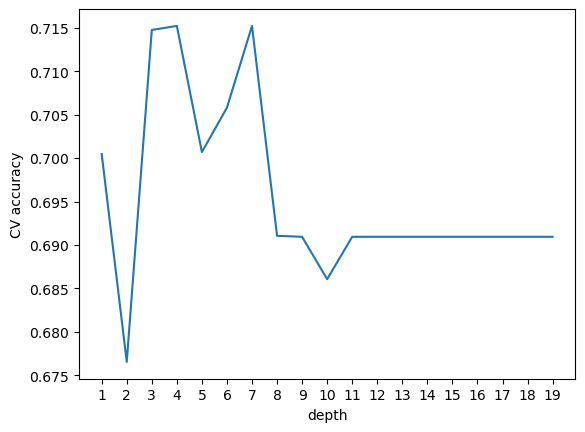

In [40]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

depth_range = range(1, 20)
cv_scores = []
for k in depth_range:
    dt = DecisionTreeClassifier(
        criterion='gini', # gini index
        random_state=0, 
        max_depth=k
        )
    
    # 5-fold cross-validation using accuracy 
    cv_scores_k = cross_val_score(
        dt,
        X_trainT,
        y_trainT,
        cv=5,
        
        scoring='accuracy'  
    )
    
    
    cv_scores.append(np.mean(cv_scores_k))

plt.plot(depth_range, cv_scores)
plt.xlabel('depth')
plt.ylabel('CV accuracy')
plt.xticks(range(1,20))

Based on the graph above we choose depth 4 as the best depth for the decision tree before overfitting occurs.

In [41]:
from sklearn import neighbors
from sklearn import metrics

k_range = range(2, 8)
scores = [] 

for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(round(metrics.accuracy_score(y_test, y_pred),2))

Now we plot the K value test scores.

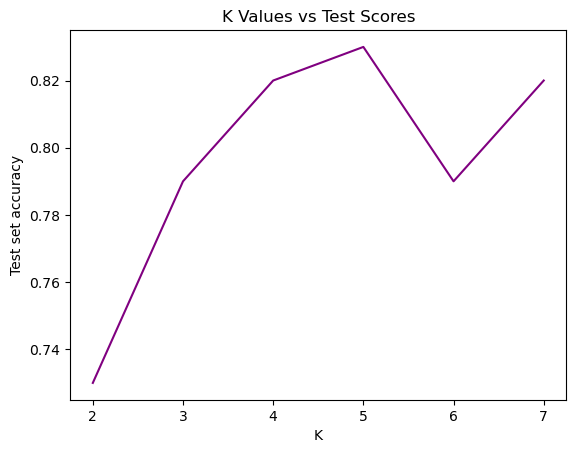

In [42]:
plt.plot(k_range, scores,color = 'purple')
plt.xlabel('K')
plt.ylabel('Test set accuracy')
plt.xticks(range(2,8))
plt.title("K Values vs Test Scores")
plt.show()

If we look at the graph we choose k = 5 as it is a simpler model with the highest test score.

12.

In [43]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import sklearn.neighbors as neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

sfs = SFS(
    estimator=knn,
    k_features=(1, 8),
    forward=True,
    floating=False,
    scoring='accuracy',
    cv=5,
)

sfs.fit(X_train, y_train)

selected_features = X_train.columns[list(sfs.k_feature_idx_)]
selected_features

X_train_sfs = X_train[selected_features]
X_test_sfs = X_test[selected_features]
m_sfs = LogisticRegression(
    solver='saga',
    max_iter=10000
)
m_sfs.fit(X_train_sfs, y_train)
m_sfs_pre = m_sfs.predict(X_test_sfs)
accuracy_score(y_test, m_sfs_pre)

0.8

13.

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#for the tree prediction
dt_best = DecisionTreeClassifier(
    max_depth = 4, 
    random_state=0
    ) 
dt_best.fit(X_trainT, y_trainT)
test_accuracyT = dt_best.score(X_testT, y_testT)
print("The accuracy score for the decision tree is ", round(test_accuracyT,2))


print("The accuracy score for the KNN classifier is ", round(accuracy_score(y_test, y_pred),2))



print("The accuracy score for stepwise subset selection based on the KNN is ", round(accuracy_score(y_test, m_sfs_pre),2))

y_predT = dt_best.predict(X_testT)

con_mat = pd.DataFrame(metrics.confusion_matrix(y_testT, y_predT),index=['Positive Test', 'Negative Test'], columns=['Positive', 'Negative'])
print(con_mat)


con_mat = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred),index=['Positive Test', 'Negative Test'], columns=['Positive', 'Negative'])
print(con_mat)

con_mat = pd.DataFrame(metrics.confusion_matrix(y_test, m_sfs_pre),index=['Positive Test', 'Negative Test'], columns=['Positive', 'Negative'])
print(con_mat)

print("The sensitivity score for the decision tree is ", round(41/57,2))
    
print("The sensitivity score for KNN classifier is", round(43/54,2))

print("The sensitivity score for stepwise subset selection based on the KNN is" , round(41/52,2))

The accuracy score for the decision tree is  0.74
The accuracy score for the KNN classifier is  0.82
The accuracy score for stepwise subset selection based on the KNN is  0.8
               Positive  Negative
Positive Test        41         7
Negative Test        16        26
               Positive  Negative
Positive Test        43         5
Negative Test        11        31
               Positive  Negative
Positive Test        41         7
Negative Test        11        31
The sensitivity score for the decision tree is  0.72
The sensitivity score for KNN classifier is 0.8
The sensitivity score for stepwise subset selection based on the KNN is 0.79


14.

In [48]:
#Fit a Decision Tree Classifier
dt_importance = DecisionTreeClassifier(max_depth=4, random_state=0)
dt_importance.fit(X_trainT, y_trainT)

#Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X_trainT.columns,
    'Importance': dt_importance.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

     Feature  Importance
12      thal    0.499709
2         cp    0.127229
9    oldpeak    0.099146
11        ca    0.075309
7    thalach    0.054671
4       chol    0.052244
0        age    0.046330
1        sex    0.045363
3   trestbps    0.000000
8      exang    0.000000
6    restecg    0.000000
5        fbs    0.000000
10     slope    0.000000


16.

Robert Questions 1,2,3,4,5

Parker Questions 6,7,8,9,14

Wesley Questions 10,11,12,13

17.
https://github.com/West3104/Assignment-6/tree/main